In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
df = pd.read_csv('/content/Mental Health in Pregnancy During Covid-19.csv.csv')

**Summary of the Data**

This dataset is about **Effect of Covid-19 on pregnant womens**

Here are some information about the data.

1. Maternal_Age: Maternal age (years) at intake
2. Household_Income: What is the total household  income, before taxes and deductions, of all the household members from all sources in 2019

3. Maternal_Education: Maternal education
  *   Less than high school
  *   diploma
  *   High school diploma
  *   College/trade school
  *   Undergraduate degree
  *   Master's degree
  *   Doctoral Degree

4.EPDS: Edinburgh Postnatal Depression Scale -> EPDS serves as a psychological health outcome variable, allowing us to study how maternal depression relates to other factors such as household income, maternal education, and anxiety levels.
  * 0–9 → Normal, low likelihood of depression

  * 10–12 → Possible depression (borderline)

  * 13 or higher → Likely depression (further evaluation needed)


5. PROMIS_Anxiety: Score from 7 to 35 with higher scores indicating greater severity of anxiety.

6. GAbirth: Gestational age at birth (in weeks)

7. Delivery_Date: Delivery Date (Dates converted to month/year of birth)

8. Birth_Length: Birth length in cm

9. Birth_Weight: Birth weight in grams

10. Delivery_Mode: Vaginally or Caesarean-section (c-section)

11. NICU_stay: Was your infant admitted to the NICU?

12. Language: Survey language

13. Threaten_Life: How much do (did) you think your life is (was) in danger during the COVID-19 pandemic? (0-100)

14. Threaten_Baby_Danger: How much do (did) you think your unborn baby's life is (was) in danger
at any time during the COVID-19 pandemic? (0-100)

15. Threaten_Baby_Harm: How much are you worried that exposure to the COVID-19 virus will harm your unborn baby? (0-100)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OSF_ID                                      10772 non-null  int64  
 1   Maternal_Age                                10661 non-null  float64
 2   Household_Income                            10521 non-null  object 
 3   Maternal_Education                          10595 non-null  object 
 4   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 5   PROMIS_Anxiety                              9566 non-null   float64
 6   Gestational_Age_At_Birth                    6734 non-null   float64
 7   Delivery_Date(converted to month and year)  6733 non-null   object 
 8   Birth_Length                                5480 non-null   float64
 9   Birth_Weight                                6078 non-null   float64
 10  Delivery_M

In [4]:
df.shape

(10772, 16)

In [5]:
(df.isnull().sum()/len(df))*100

,0
OSF_ID,0.000000
Maternal_Age,1.030449
Household_Income,2.330115
Maternal_Education,1.643149
Edinburgh_Postnatal_Depression_Scale,10.898626
PROMIS_Anxiety,11.195693
Gestational_Age_At_Birth,37.486075
Delivery_Date(converted to month and year),37.495358
Birth_Length,49.127367
Birth_Weight,43.575938


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns=['OSF_ID','Language'],inplace=True)

In [8]:
df.columns

Index(['Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth',
       'Delivery_Date(converted to month and year)', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Threaten_Life',
       'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

In [9]:
mental_health = df.copy()

In [10]:
mental_health.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,2.0,3.0,27.0
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,33.0,92.0
2,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,53.0,67.0,54.0
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23.0,32.0,71.0


In [11]:
mental_health[mental_health.isna().all(axis=1)]

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mental_health = mental_health.dropna(how='all')

In [13]:
mental_health[mental_health.isna().all(axis=1)]

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm


In [14]:
mental_health.shape

(10754, 14)

In [15]:
columns_to_check = df.columns[3:]
rows_to_drop = mental_health[columns_to_check].isna().all(axis=1)
mental_health.drop(mental_health[rows_to_drop].index,inplace=True)

In [16]:
mental_health.shape

(10292, 14)

In [17]:
mental_health.sample(10)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
3128,28.8,"$100,000 -$124,999",College/trade school,22.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,90.0,96.0
2671,32.1,"$125,000- $149,999",High school diploma,11.0,16.0,39.29,Mar2021,50.80,2835.0,Vaginally,No,24.0,38.0,68.0
138,33.1,"$150,000 - $174,999",Undergraduate degree,7.0,22.0,38.86,Jul2020,54.00,4082.0,Vaginally,No,67.0,46.0,45.0
2825,28.3,"$70,000-$99,999",Undergraduate degree,5.0,19.0,37.43,Mar2021,52.07,3544.0,Vaginally,Yes,34.0,70.0,98.0
3136,29.3,"$100,000 -$124,999",College/trade school,12.0,23.0,38.43,Aug2020,49.53,3218.0,Vaginally,No,30.0,91.0,96.0
6626,34.8,"$70,000-$99,999",College/trade school,1.0,9.0,40.86,Jul2020,53.34,4026.0,Caesarean-section (c-section),No,6.0,12.0,55.0
1586,35.7,"$70,000-$99,999",Undergraduate degree,13.0,20.0,38.29,Jul2020,48.26,3634.0,Caesarean-section (c-section),No,94.0,94.0,95.0
7583,35.6,"$100,000 -$124,999",Doctoral Degree,6.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,29.0,32.0
7446,25.9,"Less than $20, 000",College/trade school,12.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,68.0,70.0
7222,32.3,"$125,000- $149,999",Undergraduate degree,15.0,21.0,38.57,May2020,54.61,3856.0,Caesarean-section (c-section),No,47.0,48.0,49.0


In [18]:
mental_health.dropna(how='all',axis=1,inplace=True)

In [19]:
mental_health.isnull().sum()

,0
Maternal_Age,89
Household_Income,224
Maternal_Education,153
Edinburgh_Postnatal_Depression_Scale,694
PROMIS_Anxiety,726
Gestational_Age_At_Birth,3558
Delivery_Date(converted to month and year),3559
Birth_Length,4812
Birth_Weight,4214
Delivery_Mode,4755


In [20]:
columns = mental_health.columns[11:]
columns

Index(['Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm'], dtype='object')

In [21]:
rows_to_be_deleted  = mental_health[mental_health[columns].isna().all(axis=1)].index

In [22]:
mental_health.drop(rows_to_be_deleted,inplace=True)

In [23]:
mental_health[['Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm']].isnull() .sum()

,0
Threaten_Life,28
Threaten_Baby_Danger,36
Threaten_Baby_Harm,24


In [24]:
mental_health.isnull().sum()

,0
Maternal_Age,33
Household_Income,68
Maternal_Education,44
Edinburgh_Postnatal_Depression_Scale,306
PROMIS_Anxiety,338
Gestational_Age_At_Birth,3558
Delivery_Date(converted to month and year),3559
Birth_Length,4650
Birth_Weight,4114
Delivery_Mode,4598


In [25]:
mental_health[mental_health['Maternal_Age'].isna()]

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
50,NaN,NaN,NaN,3.0,8.0,39.00,Sep2020,NaN,NaN,NaN,NaN,0.0,50.0,24.0
156,NaN,NaN,NaN,2.0,19.0,36.86,Dec2020,40.64,2807.0,Caesarean-section (c-section),Yes,50.0,50.0,50.0
330,NaN,NaN,NaN,14.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,86.0,68.0
341,NaN,NaN,NaN,9.0,8.0,39.71,Aug2020,NaN,3657.0,NaN,NaN,28.0,50.0,50.0
614,NaN,NaN,NaN,15.0,27.0,40.00,Sep2020,NaN,NaN,NaN,NaN,50.0,50.0,50.0
662,NaN,NaN,NaN,8.0,10.0,39.43,Dec2020,52.00,3300.0,Vaginally,No,14.0,14.0,10.0
908,NaN,NaN,NaN,NaN,NaN,38.29,Oct2020,NaN,2778.0,NaN,NaN,50.0,25.0,20.0
1398,NaN,NaN,NaN,11.0,18.0,38.71,Aug2020,NaN,NaN,NaN,NaN,33.0,35.0,58.0
1414,NaN,NaN,NaN,9.0,13.0,39.00,Sep2020,NaN,NaN,NaN,NaN,30.0,50.0,62.0
1611,NaN,NaN,NaN,12.0,22.0,37.86,Jun2020,NaN,NaN,NaN,NaN,80.0,100.0,100.0


In [26]:
import seaborn as sns

In [27]:
mental_health.describe()

,Maternal_Age,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Birth_Length,Birth_Weight,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
count,9871.000000,9598.000000,9566.000000,6346.000000,5254.000000,5790.000000,9876.000000,9868.000000,9880.000000
mean,31.880995,10.194832,18.677713,39.346434,50.501085,3411.400173,42.342041,50.847385,62.415789
std,4.390365,5.505230,6.084313,1.612003,4.429255,539.391121,25.640246,26.650465,27.235548
min,17.000000,0.000000,7.000000,24.860000,20.000000,303.000000,0.000000,0.000000,0.000000
25%,29.000000,6.000000,14.000000,38.570000,49.000000,3100.000000,23.000000,29.000000,48.000000
50%,31.800000,10.000000,19.000000,39.570000,50.800000,3431.000000,47.000000,50.000000,66.000000
75%,34.800000,14.000000,23.000000,40.430000,53.090000,3742.000000,61.000000,71.000000,85.000000
max,49.700000,30.000000,35.000000,42.860000,70.000000,5968.000000,100.000000,100.000000,100.000000


In [28]:
numerical_columns = []
for col in mental_health.columns:
  if mental_health[col].dtype == 'float64':
    numerical_columns.append(col)
print(numerical_columns)

['Maternal_Age', 'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety', 'Gestational_Age_At_Birth', 'Birth_Length', 'Birth_Weight', 'Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm']


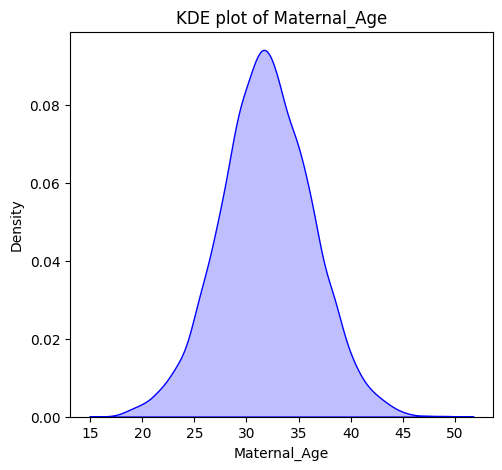

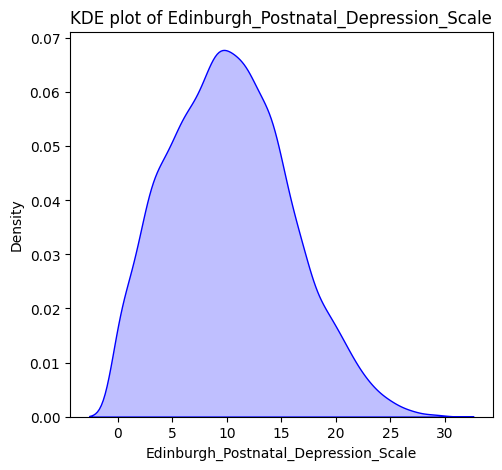

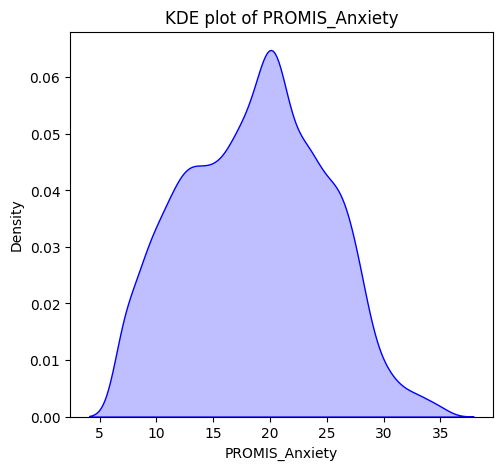

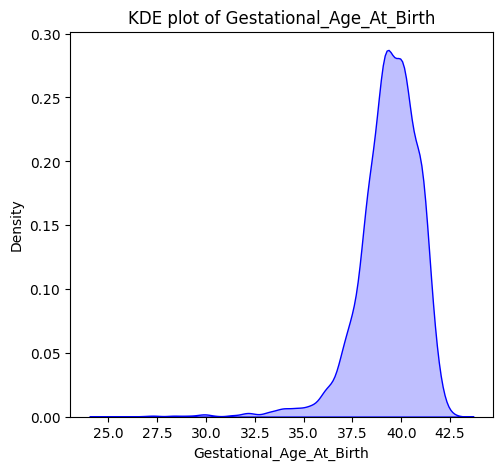

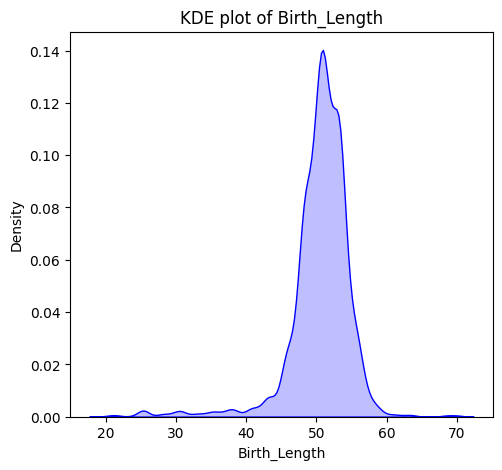

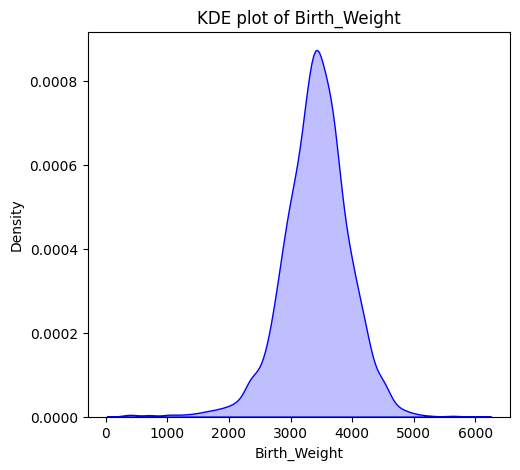

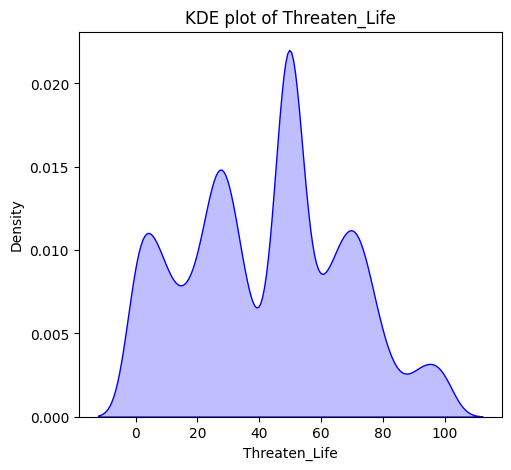

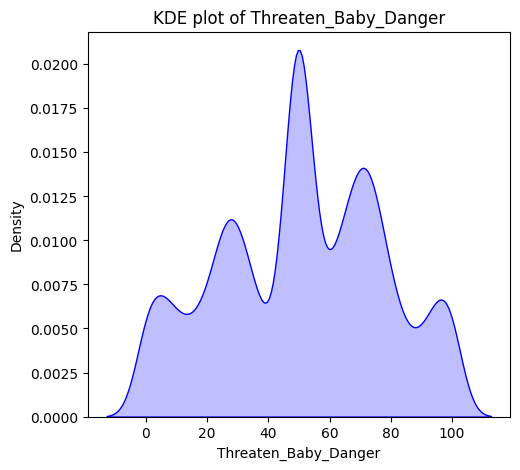

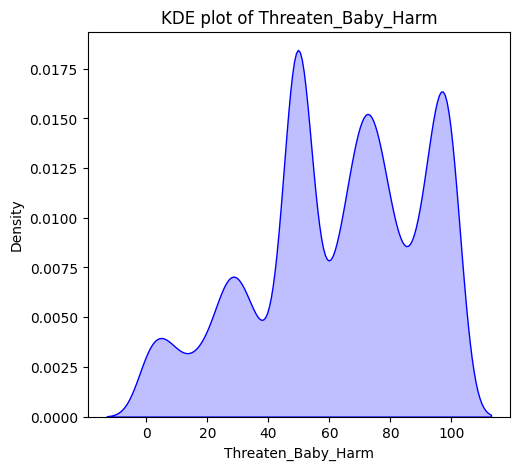

In [29]:
for col in numerical_columns:
  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)
  sns.kdeplot(data=mental_health, x=col,fill=True,color='blue')
  plt.title(f'KDE plot of {col}')

<Axes: ylabel='Maternal_Age'>

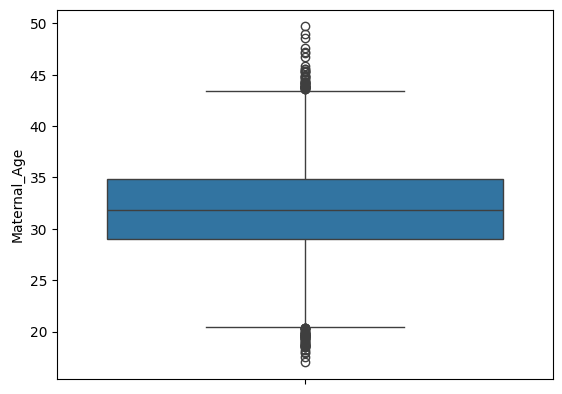

In [30]:
sns.boxplot(mental_health['Maternal_Age'])

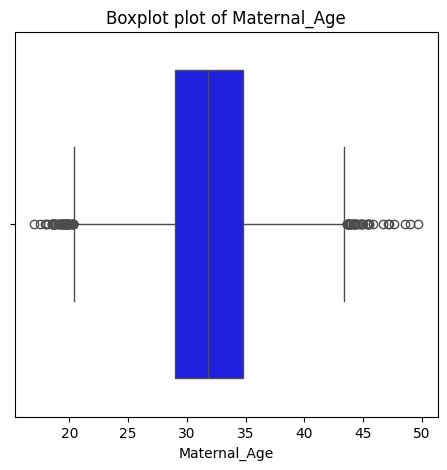

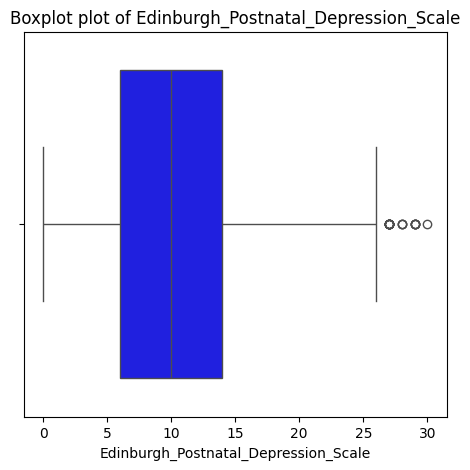

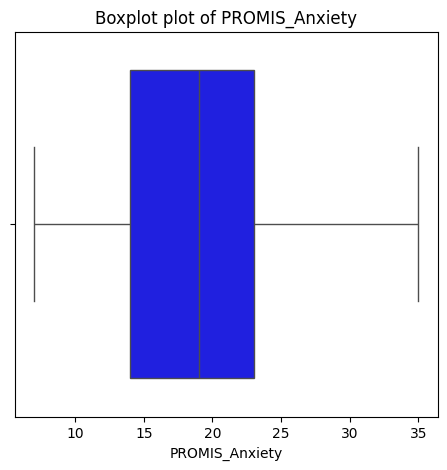

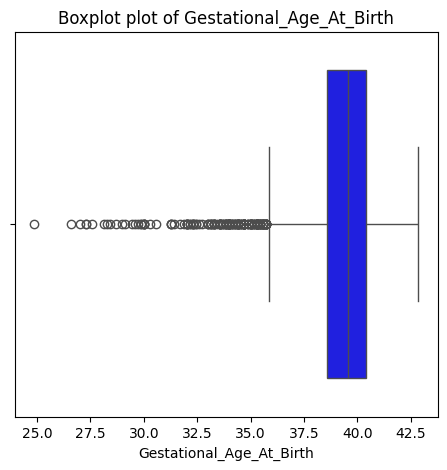

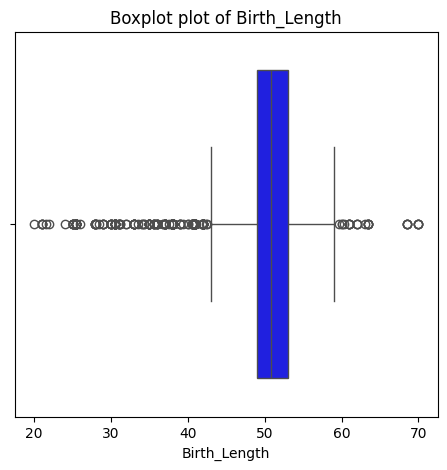

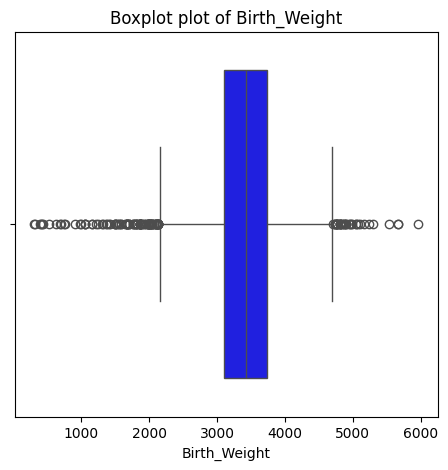

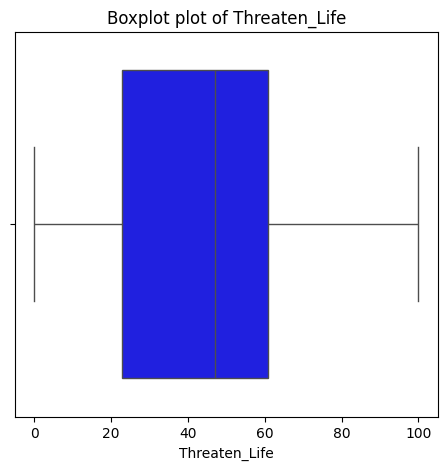

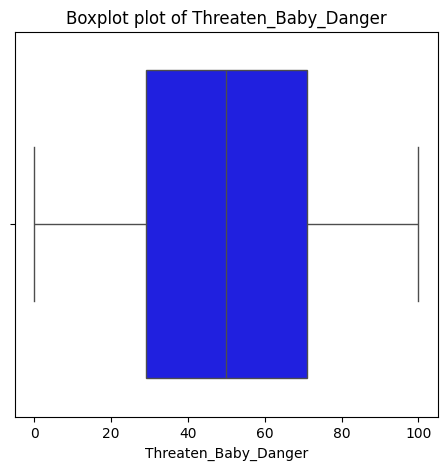

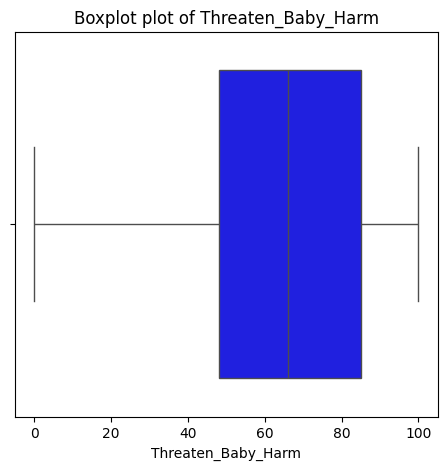

In [31]:
for col in numerical_columns:
  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)
  sns.boxplot(data=mental_health, x=col,fill=True,color='blue')
  plt.title(f'Boxplot plot of {col}')

In [32]:
print(mental_health['Household_Income'].value_counts())
print('-'*50)
print(mental_health['Maternal_Education'].value_counts())
print('-'*50)
print(mental_health['Delivery_Mode'].value_counts())
print('-'*50)
print(mental_health['NICU_Stay'].value_counts())

Household_Income
$70,000-$99,999        1953
$100,000 -$124,999     1845
$40,000-$69,999        1313
$125,000- $149,999     1284
$150,000 - $174,999    1091
$200,000+               959
$175,000- $199,999      627
$20,000- $39,999        549
Less than $20, 000      215
Name: count, dtype: int64
--------------------------------------------------
Maternal_Education
Undergraduate degree             3862
College/trade school             2515
Masters degree                   1807
High school diploma               809
Doctoral Degree                   750
Less than high school diploma     117
Name: count, dtype: int64
--------------------------------------------------
Delivery_Mode
Vaginally                        3748
Caesarean-section (c-section)    1558
Name: count, dtype: int64
--------------------------------------------------
NICU_Stay
No     4783
Yes     520
Name: count, dtype: int64


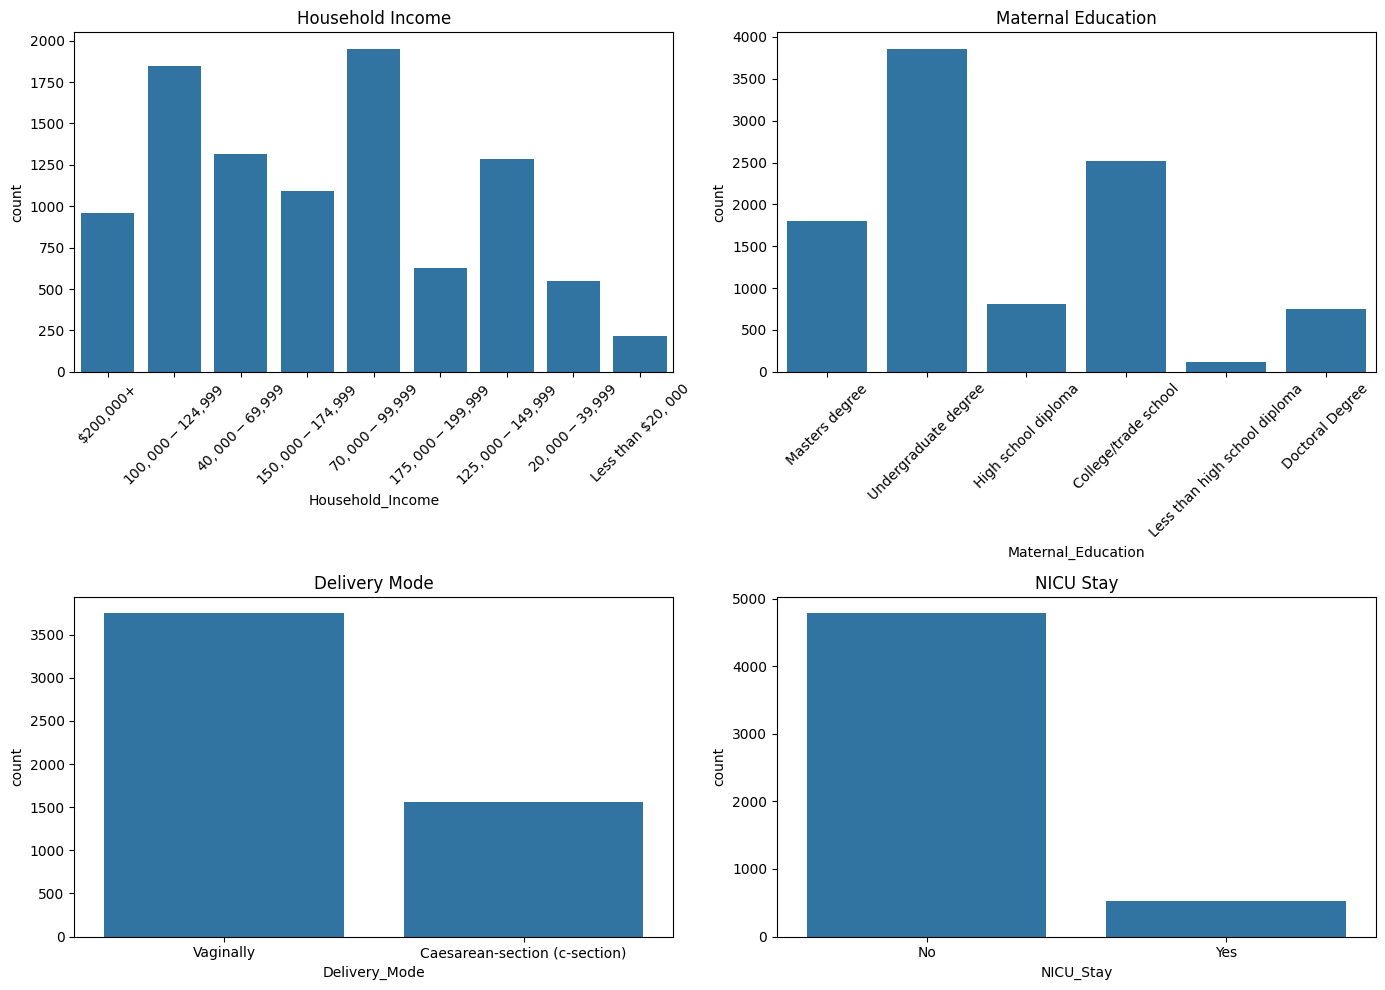

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

sns.countplot(data=mental_health, x='Household_Income', ax=axes[0])
axes[0].set_title('Household Income')
axes[0].tick_params(axis='x', rotation=45)  # Rotate labels if long

sns.countplot(data=mental_health, x='Maternal_Education', ax=axes[1])
axes[1].set_title('Maternal Education')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=mental_health, x='Delivery_Mode', ax=axes[2])
axes[2].set_title('Delivery Mode')

sns.countplot(data=mental_health, x='NICU_Stay', ax=axes[3])
axes[3].set_title('NICU Stay')

plt.tight_layout()
plt.show()


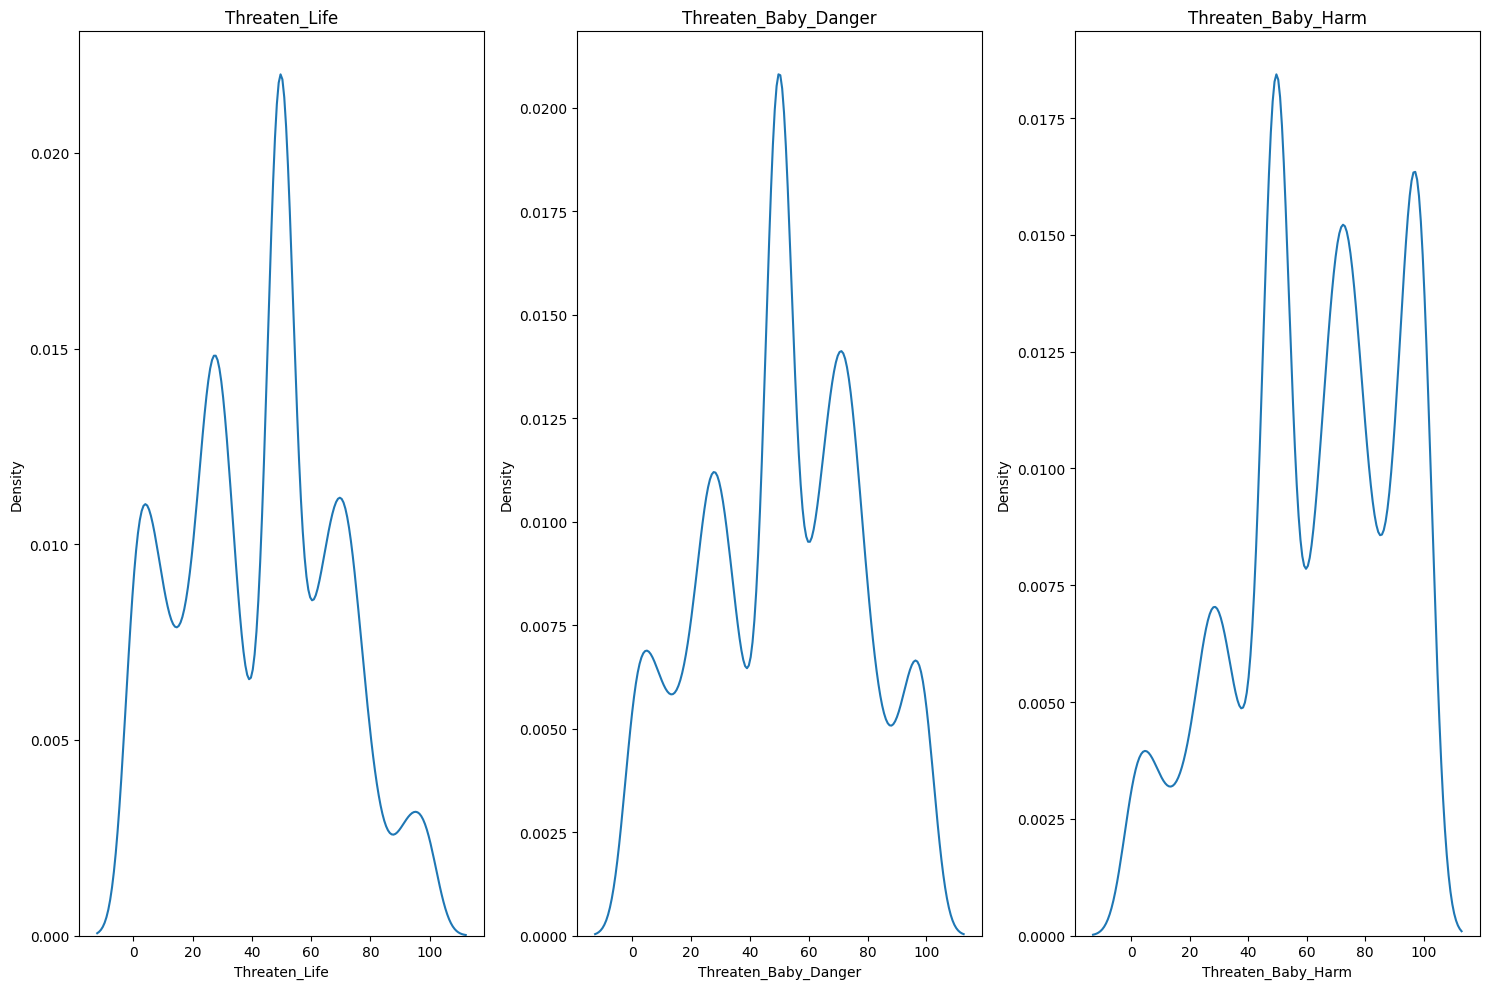

In [34]:
fig, axes = plt.subplots(1,3, figsize=(15,10))
axes = axes.flatten()

sns.kdeplot(x=mental_health['Threaten_Life'],ax=axes[0])
axes[0].set_title('Threaten_Life')

sns.kdeplot(x=mental_health['Threaten_Baby_Danger'],ax=axes[1])
axes[1].set_title('Threaten_Baby_Danger')

sns.kdeplot(x=mental_health['Threaten_Baby_Harm'],ax = axes[2])
axes[2].set_title('Threaten_Baby_Harm')

plt.tight_layout()
plt.show()

In [35]:
#Bi-Variate_Analysis

In [36]:
#W know about the delivery in months. so i am converting this data into month from weeks
mental_health['Gestational_Age_At_Birth']= np.round(mental_health['Gestational_Age_At_Birth']/4.33,2)

In [37]:
mental_health.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,"$200,000+",Masters degree,9.0,13.0,9.17,Dec2020,49.20,3431.0,Vaginally,No,2.0,3.0,27.0
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,33.0,92.0
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,8.91,Dec2020,41.00,2534.0,Vaginally,No,53.0,67.0,54.0
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,9.21,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23.0,32.0,71.0
5,38.3,"$150,000 - $174,999",Undergraduate degree,3.0,8.0,8.91,Jun2020,NaN,NaN,NaN,NaN,29.0,36.0,33.0


In [38]:
#Lets create column for healthy_birth_weight from Birth_Weight

def healthy_weight(row):
  if pd.isnull(row['Birth_Weight']):
    return 'Data Missing'
  elif row['Birth_Weight']>2550 and row['Birth_Weight']<4000:
    return 'Healthy'
  else:
    return 'Unhealthy'

#Lets create column for healthy_birth_length from Birth_Length
def healthy_height(row):
  if pd.isnull(row['Birth_Length']):
    return 'Data Missing'
  elif row['Birth_Length']>39 and row['Birth_Length']<61:
    return 'Healthy'
  else:
    return 'Unhealthy'



In [39]:
mental_health['Weight'] = mental_health.apply(healthy_weight, axis=1)
mental_health['Height'] = mental_health.apply(healthy_height,axis=1)

In [40]:
mental_health.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,Weight,Height
0,38.3,"$200,000+",Masters degree,9.0,13.0,9.17,Dec2020,49.20,3431.0,Vaginally,No,2.0,3.0,27.0,Healthy,Healthy
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,33.0,92.0,Data Missing,Data Missing
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,8.91,Dec2020,41.00,2534.0,Vaginally,No,53.0,67.0,54.0,Unhealthy,Healthy
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,9.21,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23.0,32.0,71.0,Healthy,Healthy
5,38.3,"$150,000 - $174,999",Undergraduate degree,3.0,8.0,8.91,Jun2020,NaN,NaN,NaN,NaN,29.0,36.0,33.0,Data Missing,Data Missing


In [41]:
mental_health['Weight'].value_counts()

,count
Weight,
Healthy,4812
Data Missing,4114
Unhealthy,978


In [42]:
df.columns

Index(['Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth',
       'Delivery_Date(converted to month and year)', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Threaten_Life',
       'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

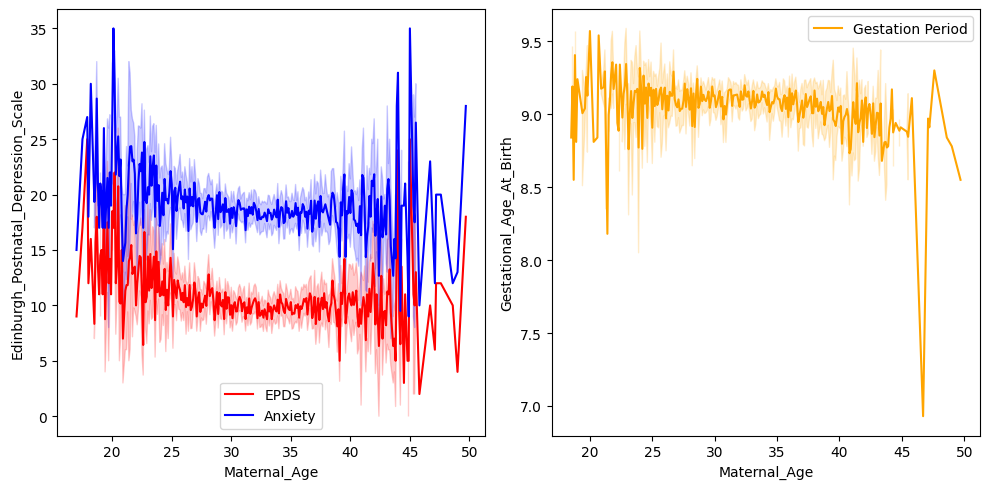

In [43]:
#Analysis

fig,axs= plt.subplots(1,2, figsize=(10,5))
axs= axs.flatten()

sns.lineplot(x='Maternal_Age', y='Edinburgh_Postnatal_Depression_Scale', data=mental_health, ax=axs[0],color='red' ,label='EPDS')
sns.lineplot(x='Maternal_Age', y='PROMIS_Anxiety', data=mental_health, ax=axs[0],color='blue' ,label='Anxiety')

sns.lineplot(x='Maternal_Age', y='Gestational_Age_At_Birth', data=mental_health, ax=axs[1],color='orange' ,label='Gestation Period')


plt.tight_layout()
plt.show()




*   If a lady is in the age group 25-38 while conceiving she will not be under any anxiety attacks , moreover she will also not suffer from any after-pregnancy depression and can take care of herself and her new born more effectively.

*   If a female is conceiving beyond the age of 42, this is very risky for the baby as there are very high chances of pre-mature birth of the baby and the pre-mature birth may be in less than 7.5 months of gestation periods.



In [44]:
mental_health[['Birth_Length',"Birth_Weight"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9904 entries, 0 to 10771
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Birth_Length  5254 non-null   float64
 1   Birth_Weight  5790 non-null   float64
dtypes: float64(2)
memory usage: 490.2 KB


In [45]:
mental_health['Maternal_Age'].info()

<class 'pandas.core.series.Series'>
Index: 9904 entries, 0 to 10771
Series name: Maternal_Age
Non-Null Count  Dtype  
--------------  -----  
9871 non-null   float64
dtypes: float64(1)
memory usage: 412.8 KB


<Axes: xlabel='Maternal_Age', ylabel='Birth_Weight'>

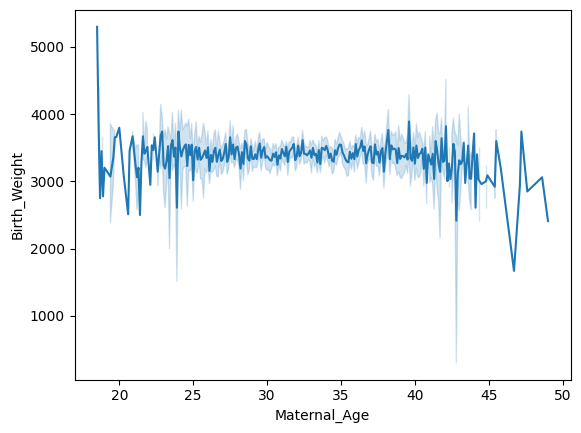

In [46]:
sns.lineplot(data=mental_health, x='Maternal_Age', y='Birth_Weight')



*   Women's with Age less than 25 have baby_weight greater than average weight which can be threat_harm to the mother as she is immature to give birth.

*   While women with Age greater than 48 have baby weight less than average weight(3000gm) of new born baby. so here more chance of Threaten_baby_harm.





<Axes: xlabel='Delivery_Mode', ylabel='Maternal_Age'>

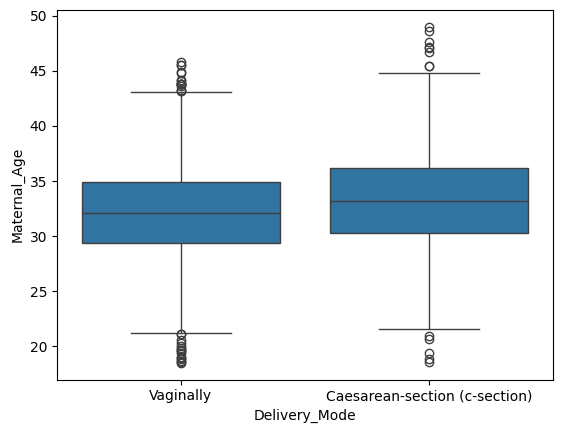

In [47]:
sns.boxplot(data=mental_health, x='Delivery_Mode', y='Maternal_Age')


1. Median (central line in the box)

Vaginal delivery group: Median maternal age is around 32 years.

C-section group: Median maternal age is slightly higher, around 33–34 years.
  This suggests that mothers who had a C-section are on average a bit older than those who delivered vaginally.

2. Interquartile Range (box area)

Vaginal delivery: Most ages fall between 29–35 years.

C-section: Most ages fall between 30–37 years.
 The C-section age range is shifted slightly upward compared to vaginal delivery.

3. Spread & Outliers

Both groups have outliers at very young ages (<20 years) and older ages (>40 years).

However, the C-section group shows more mothers above 35 years compared to vaginal delivery.
Suggests that advanced maternal age is more associated with C-sections.

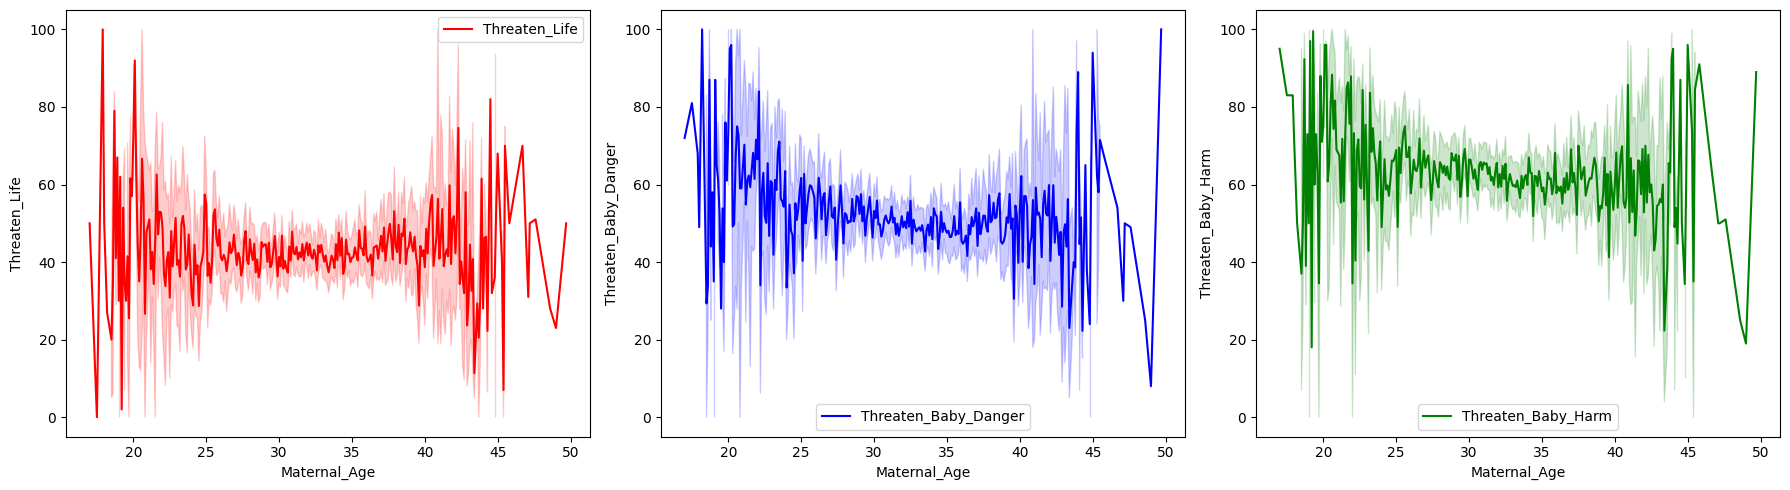

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

sns.lineplot(x='Maternal_Age', y='Threaten_Life', data=mental_health, color='red', label='Threaten_Life', ax=axes[0])
sns.lineplot(x='Maternal_Age', y='Threaten_Baby_Danger', data=mental_health, color='blue', label='Threaten_Baby_Danger', ax=axes[1])
sns.lineplot(x='Maternal_Age', y='Threaten_Baby_Harm', data=mental_health, color='green', label='Threaten_Baby_Harm', ax=axes[2])

plt.tight_layout()
plt.show()


- Female of the age group 25-42 are less worried about the impact of covid-19 on them and their new born health, damang, they are less worried as compared to females who conceived in less than 25 and females conceiving in after the age 45. its also evident that female after the age of 43 are more worried about the impact of covid-19 on lady and baby , this may be reason for high anxiety and after-pregnency depression in this age group

In [49]:
mental_health.Delivery_Mode.shape

(9904,)

In [50]:
new_df = mental_health[mental_health['Delivery_Mode'].notnull()]

In [51]:
new_df = new_df[['Delivery_Mode','Maternal_Age']]

In [52]:
# I am going to devide my maternal age into groups and test which age group has which mode of delivery.

def age_category(rows):
  if(rows['Maternal_Age']<23):
    return 'UnderAge'
  elif (rows['Maternal_Age']>=23 and rows['Maternal_Age']<38):
    return 'Healthy'
  else:
    return 'Old Age'

new_df['Age_Category'] = new_df.apply(age_category,axis=1)

In [53]:
new_df

,Delivery_Mode,Maternal_Age,Age_Category
0,Vaginally,38.3,Old Age
3,Vaginally,28.8,Healthy
4,Caesarean-section (c-section),36.5,Healthy
8,Vaginally,33.1,Healthy
13,Vaginally,29.2,Healthy
...,...,...,...
10755,Caesarean-section (c-section),41.7,Old Age
10756,Caesarean-section (c-section),27.8,Healthy
10757,Vaginally,36.2,Healthy
10761,Vaginally,33.2,Healthy


In [54]:
new_df.groupby('Age_Category')['Delivery_Mode'].value_counts().reset_index()

,Age_Category,Delivery_Mode,count
0,Healthy,Vaginally,3406
1,Healthy,Caesarean-section (c-section),1317
2,Old Age,Vaginally,301
3,Old Age,Caesarean-section (c-section),227
4,UnderAge,Vaginally,41
5,UnderAge,Caesarean-section (c-section),14



- After the age of 38, there is a notable 13%[28-41%] increase in the likelihood of women requiring a c-section rather than opting for a natural delivery. this statistic underscores the physiological changes associated with maternal age and their implications for childbirth.

In [55]:
cols = ['NICU_Stay','Weight','Height']

In [57]:
mental_health

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,Weight,Height
0,38.3,"$200,000+",Masters degree,9.0,13.0,9.17,Dec2020,49.20,3431.0,Vaginally,No,2.0,3.0,27.0,Healthy,Healthy
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,33.0,92.0,Data Missing,Data Missing
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,8.91,Dec2020,41.00,2534.0,Vaginally,No,53.0,67.0,54.0,Unhealthy,Healthy
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,9.21,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23.0,32.0,71.0,Healthy,Healthy
5,38.3,"$150,000 - $174,999",Undergraduate degree,3.0,8.0,8.91,Jun2020,NaN,NaN,NaN,NaN,29.0,36.0,33.0,Data Missing,Data Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10766,32.7,"$70,000-$99,999",High school diploma,15.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,64.0,75.0,Data Missing,Data Missing
10767,38.3,"$100,000 -$124,999",Undergraduate degree,10.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,62.0,74.0,Data Missing,Data Missing
10769,27.7,"$20,000- $39,999",College/trade school,4.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,93.0,76.0,Data Missing,Data Missing
10770,23.0,"$20,000- $39,999",College/trade school,12.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,94.0,94.0,Data Missing,Data Missing


## Effect of Household income on other columns like EPDS, Anxiety, Baby_Danger, Baby_Life,

In [59]:
categories = mental_health['Household_Income'].unique()

In [60]:
categories

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', '$70,000-$99,999', '$175,000- $199,999',
       '$125,000- $149,999', '$20,000- $39,999', 'Less than $20, 000',
       nan], dtype=object)

In [66]:
import plotly.express as px

In [74]:
categories = mental_health['Household_Income'].unique()
for i in categories:
  df = mental_health[mental_health['Household_Income']==i]
  fig = px.histogram(mental_health,x='PROMIS_Anxiety',color='Household_Income',
                     title='Distribution of Anxiety by Household Income',
                      hover_data = mental_health.columns)

fig.update_layout(
    xaxis_title='PROMIS_Anxiety',
    yaxis_title='Count',
    legend_title = 'Household Income',
    barmode = 'relative'
  )
fig.show()

In [77]:
for i in categories:
  df = mental_health[mental_health['Household_Income'] == i]
  fig = px.histogram(mental_health,x='Edinburgh_Postnatal_Depression_Scale', color='Household_Income',
                     title='Distribution of EPDS by Household_Income')

fig.update_layout(
    xaxis_title='Edinburgh_Postnatal_Depression_Scale',
    yaxis_title='Count',
    legend_title='Household_Income',
    barmode='overlay'
)
fig.show()

- It is evident from the observations that people living below the poverty line ($70,000) are significantly have more anxiety and Dipression (Edinburgh Postnatal Depression Scale) scores. Within this income bracket, nearly 70% of the population has been diagnosed with anxiety and depression, exacerbated by the conditions brought on by the COVID-19 pandemic.


- People who have large household_income have less anxiety and dipression.

-  The COVID-19 pandemic has had large adverse impact on low-income families, particularly those below the survival line. The shortage of income has increased their worries about the well-being of their children and women. Families below the survival line exhibit a very high threatening score for women, with an average score of 51/100. In contrast, as income levels rise, concerns diminish, likely due to better access to healthcare facilities for higher-income families.




In [80]:
mental_health[mental_health['Threaten_Life']!=' ']

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,Weight,Height
0,38.3,"$200,000+",Masters degree,9.0,13.0,9.17,Dec2020,49.20,3431.0,Vaginally,No,2.0,3.0,27.0,Healthy,Healthy
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,33.0,92.0,Data Missing,Data Missing
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,8.91,Dec2020,41.00,2534.0,Vaginally,No,53.0,67.0,54.0,Unhealthy,Healthy
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,9.21,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23.0,32.0,71.0,Healthy,Healthy
5,38.3,"$150,000 - $174,999",Undergraduate degree,3.0,8.0,8.91,Jun2020,NaN,NaN,NaN,NaN,29.0,36.0,33.0,Data Missing,Data Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10766,32.7,"$70,000-$99,999",High school diploma,15.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,64.0,75.0,Data Missing,Data Missing
10767,38.3,"$100,000 -$124,999",Undergraduate degree,10.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,62.0,74.0,Data Missing,Data Missing
10769,27.7,"$20,000- $39,999",College/trade school,4.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,93.0,76.0,Data Missing,Data Missing
10770,23.0,"$20,000- $39,999",College/trade school,12.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,94.0,94.0,Data Missing,Data Missing


In [83]:
mental_health['Threaten_Life'].info()

<class 'pandas.core.series.Series'>
Index: 9904 entries, 0 to 10771
Series name: Threaten_Life
Non-Null Count  Dtype  
--------------  -----  
9876 non-null   float64
dtypes: float64(1)
memory usage: 412.8 KB


In [84]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9904 entries, 0 to 10771
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                9871 non-null   float64
 1   Household_Income                            9836 non-null   object 
 2   Maternal_Education                          9860 non-null   object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6346 non-null   float64
 6   Delivery_Date(converted to month and year)  6345 non-null   object 
 7   Birth_Length                                5254 non-null   float64
 8   Birth_Weight                                5790 non-null   float64
 9   Delivery_Mode                               5306 non-null   object 
 10  NICU_Stay       

In [88]:
df.groupby('Household_Income')['Threaten_Life'].mean().reset_index().sort_values('Threaten_Life',ascending=False)

,Household_Income,Threaten_Life
8,"Less than $20, 000",50.771028
4,"$20,000- $39,999",47.727106
6,"$40,000-$69,999",45.215491
7,"$70,000-$99,999",42.388205
0,"$100,000 -$124,999",41.783813
2,"$150,000 - $174,999",41.392463
1,"$125,000- $149,999",40.482463
3,"$175,000- $199,999",40.062300
5,"$200,000+",39.456635


In [105]:
df = mental_health[mental_health['Threaten_Baby_Danger']!=' ']
df['Threaten_Baby_Danger'] = df['Threaten_Baby_Danger'].dropna()


In [106]:
df.groupby('Household_Income')['Threaten_Baby_Danger'].mean().reset_index().sort_values('Threaten_Baby_Danger', ascending=False)

,Household_Income,Threaten_Baby_Danger
8,"Less than $20, 000",60.276995
4,"$20,000- $39,999",58.310786
6,"$40,000-$69,999",53.740031
7,"$70,000-$99,999",52.033933
0,"$100,000 -$124,999",50.288200
1,"$125,000- $149,999",48.904762
2,"$150,000 - $174,999",48.456382
3,"$175,000- $199,999",46.923200
5,"$200,000+",46.885057


In [108]:
df.groupby('Household_Income')['Threaten_Baby_Harm'].mean().reset_index().sort_values('Threaten_Baby_Harm', ascending=False)

,Household_Income,Threaten_Baby_Harm
8,"Less than $20, 000",66.985915
4,"$20,000- $39,999",66.718464
7,"$70,000-$99,999",63.633470
6,"$40,000-$69,999",63.476263
0,"$100,000 -$124,999",62.386327
1,"$125,000- $149,999",62.027301
3,"$175,000- $199,999",60.517572
5,"$200,000+",60.134937
2,"$150,000 - $174,999",59.983501


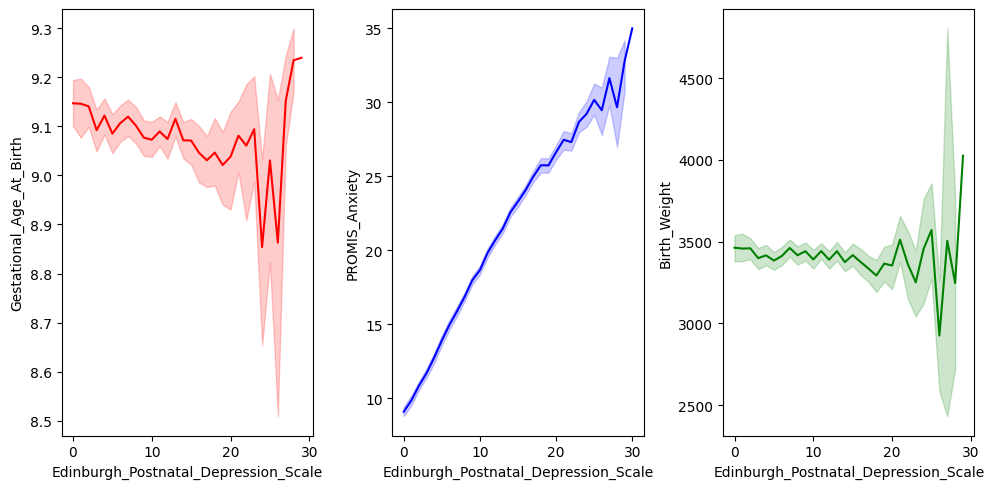

In [160]:
fig,axs = plt.subplots(1,3, figsize=(10,5))
axs =axs.flatten()

sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale',y='Gestational_Age_At_Birth',data=mental_health,color='red',ax=axs[0])

sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale',y='PROMIS_Anxiety',data=mental_health,color='blue',ax=axs[1])

sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale',y='Birth_Weight',data=mental_health,color='green',ax=axs[2])

plt.tight_layout()
plt.show()

- By first plot we can absorve that EPDS_Scale> 20 have more chances of premature birth but it is not that much affect because it is happening in between 8 -9 month which are average month to give birth to a healthy child.

- By second plot we can make conclusion that anxiety and dipression are highly co-related. which is obious in real life also.

- by last plot we can say that EPDS has not that much affect on baby weight because it was  in range of average weight which falls within the medically accepted range and thus, poses minimal health risks to the newborn.

In [110]:
# Weight and Delivery Mode

In [115]:
df1 = mental_health[mental_health['Weight']!='Data Missing']

In [117]:
df1 = df1[df1['Delivery_Mode'].notnull()]

In [122]:
df1.groupby('Weight')['Delivery_Mode'].value_counts().reset_index()

,Weight,Delivery_Mode,count
0,Healthy,Vaginally,3186
1,Healthy,Caesarean-section (c-section),1225
2,Unhealthy,Vaginally,560
3,Unhealthy,Caesarean-section (c-section),332


In [127]:
# Weight and NICU_Stay
df1 = df1[df1['NICU_Stay'].notnull()]

In [128]:
df1.groupby('Weight')['NICU_Stay'].value_counts().reset_index()

,Weight,NICU_Stay,count
0,Healthy,No,4083
1,Healthy,Yes,326
2,Unhealthy,No,698
3,Unhealthy,Yes,194


In [129]:
#height and delivery mode
df1= mental_health[mental_health['Height']!='Data Missing']
df1= df1[df1['Delivery_Mode'].notnull()]
df1.groupby('Height')['Delivery_Mode'].value_counts().reset_index()

,Height,Delivery_Mode,count
0,Healthy,Vaginally,3618
1,Healthy,Caesarean-section (c-section),1477
2,Unhealthy,Vaginally,97
3,Unhealthy,Caesarean-section (c-section),62


In [130]:
#height and NICU STAY
df1= mental_health[mental_health['Height']!='Data Missing']
df1= df1[df1['NICU_Stay'].notnull()]
df1.groupby('Height')['NICU_Stay'].value_counts().reset_index()

,Height,NICU_Stay,count
0,Healthy,No,4616
1,Healthy,Yes,479
2,Unhealthy,No,124
3,Unhealthy,Yes,35


-  There is clearly visible that women with babies of unhealthy birth weight will undergo a C-section, which is 10% higher than the likelihood for those with babies of healthy birth weight. This pattern is similarly observed with birth height, indicating a strong link between unhealthy birth metrics and the necessity for C-sections


- Birth Weight: Babies with unhealthy birth weight face a 22% likelihood of NICU admission, which is nearly 3 times higher than the 7.4% observed for babies with healthy birth weight.

- Delivery Mode & Height: Unhealthy birth height is more common among C-section deliveries (4.0%) compared to vaginal deliveries (2.6%), suggesting a possible link between delivery method and neonatal growth outcomes.

- Birth Height & NICU Stay: Babies with unhealthy height are admitted to the NICU at a rate of 22.0%, more than double the rate of 9.4% seen in babies with healthy height.

In [ ]:
#Multivariate_Analysis -> analysis of more than 2 cols together to get the info about impact of cols on data

# Vanurable groups => These are the groups that are mostly effected when any pandamic occur like poor peole,moslty

# Survival_Income_in_canada = $70,000

Maternal Age, Household_income and Maternal_Education has what impact on dipression(like if women is educated and have more household_income and less age then have less chances of dipression),PROMIS_Anxiety.



In [138]:
mental_health.groupby(
    ['Maternal_Age','Household_Income','Maternal_Education']
)['Edinburgh_Postnatal_Depression_Scale'].mean().reset_index().sort_values(
    'Edinburgh_Postnatal_Depression_Scale', ascending=False
).head(20)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale
50,20.5,"$40,000-$69,999",College/trade school,29.0
2628,34.3,"$20,000- $39,999",College/trade school,29.0
2025,32.1,"$40,000-$69,999",High school diploma,28.0
4016,42.2,"$40,000-$69,999",College/trade school,28.0
27,19.6,"$20,000- $39,999",High school diploma,27.0
989,28.2,"Less than $20, 000",College/trade school,27.0
41,20.2,"Less than $20, 000",College/trade school,27.0
215,23.4,"$40,000-$69,999",High school diploma,26.0
1034,28.4,"$40,000-$69,999",High school diploma,26.0
393,25.0,"$70,000-$99,999",College/trade school,26.0


In [161]:
#lets see  the probability of   women with low EPDS  having high  Anxiety

a= len(mental_health[mental_health['Edinburgh_Postnatal_Depression_Scale']<12])
b= len(mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale']<12)&(mental_health['PROMIS_Anxiety']>20)])

print(f"Probability of women having low EPDS and high Anxiety is {(b/a)*100}")


#lets see  the probability of   women with high EPDS  having high  Anxiety

a= len(mental_health[mental_health['Edinburgh_Postnatal_Depression_Scale']>12])
b= len(mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale']>12)&(mental_health['PROMIS_Anxiety']>20)])

print(f"Probability of women having high EPDS and high Anxiety is {(b/a)*100}")

Probability of women having low EPDS and high Anxiety is 14.884768670940913
Probability of women having high EPDS and high Anxiety is 81.31833801936895


- The most vulnerable group to high scores on the Edinburgh Postnatal Depression Scale (EPDS) consists of women of all age groups with low household income and low education levels. However, there are notable instances where women from high-income and highly educated backgrounds are also susceptible to high EPDS scores. This vulnerability predominantly affects women aged 40 and above, suggesting that advanced maternal age can be a significant risk factor for depression during pregnancy and postpartum.


- There is a 14% likelihood that women with low EPDS (depression) scores will experience high anxiety. Conversely, women with high EPDS scores have an 81% chance of also experiencing high anxiety, particularly exacerbated by the stress and uncertainties brought on by the COVID-19 pandemic. This strong correlation underscores the compounded mental health challenges faced by this group during such crise